<div style="background-color:#34bab1; color:black; text-align:center; vertical-align: middle; padding:30px 0; border-radius: 25px; font-size: 25px; font-family: Times, serif;">IMPORT PACKAGES</div>

In [ ]:
!pip install -q visualkeras
!pip install -q ann_visualizer
!pip install -q dtreeviz

     |████████████████████████████████| 992 kB 4.1 MB/s 
     |████████████████████████████████| 61 kB 157 kB/s 


In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras import regularizers

## TO VISUALIZE
from tensorflow.keras.preprocessing import image
import visualkeras
from ann_visualizer.visualize import ann_viz
from dtreeviz.trees import *
from tensorflow.keras.utils import plot_model

## TO IGNORE WARNINGS
import warnings 
warnings.filterwarnings('ignore')

<div style="background-color:#34bab1; color:white; text-align:center; vertical-align: middle; padding:30px 0; border-radius: 25px; font-size: 25px; font-family: Times, serif;">LOAD DATA</div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## to load image

data_dir = '/content/drive/MyDrive/project/colored_images/'
data = tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 3664 files belonging to 5 classes.


<div style="background-color:#34bab1; color:black; text-align:center; vertical-align: middle; padding:30px 0; border-radius: 25px; font-size: 25px; font-family: Times, serif;">DATA PREPROCESSING</div>

In [ ]:
#Filtering out corrupted images

import os
num_skipped = 0
for folder_name in ('Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe'):
    folder_path = os.path.join(data_dir, folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()
        # if not is_jfif:
        #     num_skipped += 1
        #     # Delete corrupted image
        #     os.remove(fpath)
print("Deleted %d images" % num_skipped)

Deleted 0 images


In [ ]:
# Create an ImageDataGenerator and do Image Augmentation


datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest',
        validation_split = 0.2)

In [ ]:
## inizalize some parameters

height = 224
width = 224
channels = 3
batch_size = 32
img_shape = (height, width, channels)
img_size = (height, width)

In [ ]:
## generate training and testing data

train_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 2932 images belonging to 5 classes.
Found 732 images belonging to 5 classes.


<div style="background-color:#34bab1; color:black; text-align:center; vertical-align: middle; padding:30px 0; border-radius: 25px; font-size: 25px; font-family: Times, serif;">VISUALIZATION</div>

In [ ]:
## lests create helper function

def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

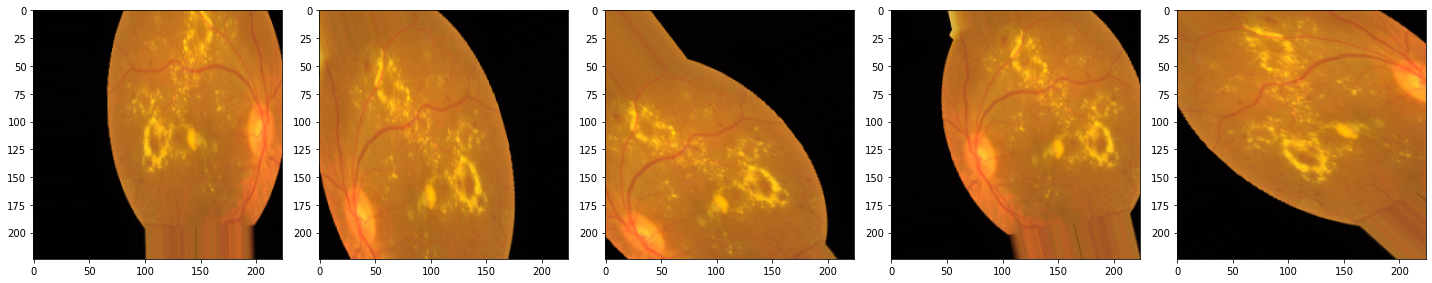

In [ ]:
# Plot a few training images
img_array = [train_data[0][0][0] for i in range(6)]
plotImages(img_array)

In [ ]:
num_classes = len(data.class_names)
print('.... Number of Classes : {0} ....'.format(num_classes))

.... Number of Classes : 5 ....


<div style="background-color:#34bab1; color:black; text-align:center; vertical-align: middle; padding:30px 0; border-radius: 15px; font-size: 25px; font-family: Times, serif;">CUSTOM MODEL DEVELOPMENT</div>

In [ ]:
# Model building
#Instatiating A convnet

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0